## Plot Topography Beta <br> - *Do what GMT can do in Python*
### Created on: 2017-12-11

### Disable auto-scrolling

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Set-up environment
The script needs `vincent`. In Terminal, type
```
$ pip install vincent
```
to install it.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Examine working directory

In [3]:
import os
import shutil

# Examine working directory.
outdir = './output/basemap_module/'

if os.path.isdir(outdir):
    print "Cleaning previous output..."
    shutil.rmtree(outdir)
    os.mkdir(outdir)
else:
    os.mkdir(outdir)

Cleaning previous output...


### Python basemap module
**Instructions of installation**
```
sudo conda install basemap
```
Do not use
```
sudo port install py27-matplotlib-basemap
```
It does not compromise with `Anaconda`.

### Activate my profile

/Users/Sabber/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Sabber/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


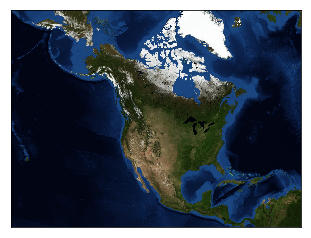

File saved as: ./output/basemap_module/MyProfileName.png


In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()

filename = outdir + 'MyProfileName.png'
plt.savefig(filename)
plt.show()
print "File saved as:", filename

### Custom hillshading in a 3D surface plot

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource

def custom_shaded_3d_surface(colormap=cm.gist_earth):
    # Load and format data
    filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
    with np.load(filename) as dem:
        z = dem['elevation']
        nrows, ncols = z.shape
        x = np.linspace(dem['xmin'], dem['xmax'], ncols)
        y = np.linspace(dem['ymin'], dem['ymax'], nrows)
        x, y = np.meshgrid(x, y)

    region = np.s_[5:50, 5:50]
    x, y, z = x[region], y[region], z[region]

    # Set up plot
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

    ls = LightSource(270, 45)
    # To use a custom hillshading mode, override the built-in shading and pass
    # in the rgb colors of the shaded surface calculated from "shade".
    rgb = ls.shade(z, cmap=colormap, vert_exag=0.1, blend_mode='soft')
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                           linewidth=0, antialiased=False, shade=False)

    plt.show()

### Try with different colormaps

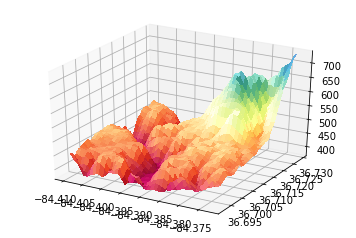

CPU times: user 2.35 s, sys: 55.4 ms, total: 2.4 s
Wall time: 2.34 s


In [6]:
%time custom_shaded_3d_surface(cm.Spectral)

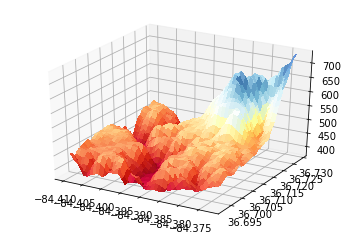

CPU times: user 2.45 s, sys: 68.1 ms, total: 2.51 s
Wall time: 2.49 s


In [7]:
%time custom_shaded_3d_surface(cm.RdYlBu)

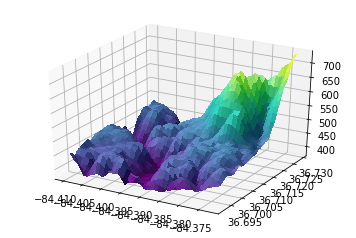

CPU times: user 2.42 s, sys: 58.1 ms, total: 2.48 s
Wall time: 2.45 s


In [8]:
%time custom_shaded_3d_surface(cm.viridis)

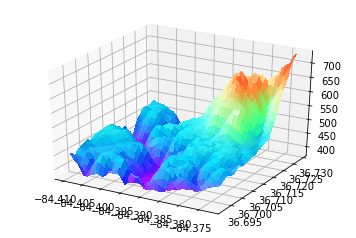

CPU times: user 2.36 s, sys: 50.1 ms, total: 2.41 s
Wall time: 2.35 s


In [9]:
%time custom_shaded_3d_surface(cm.rainbow)

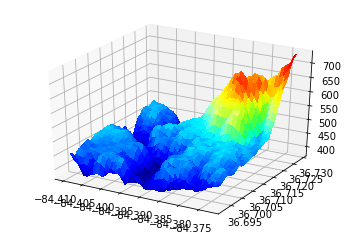

CPU times: user 2.41 s, sys: 49.4 ms, total: 2.46 s
Wall time: 2.43 s


In [10]:
%time custom_shaded_3d_surface(cm.jet)

### Color example code

In [11]:
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource

def topographic_hillshading(filename, colormap=plt.cm.gist_earth):
    with np.load(get_sample_data('jacksboro_fault_dem.npz')) as dem:
        z = dem['elevation']

        #-- Optional dx and dy for accurate vertical exaggeration ----------------
        # If you need topographically accurate vertical exaggeration, or you don't
        # want to guess at what *vert_exag* should be, you'll need to specify the
        # cellsize of the grid (i.e. the *dx* and *dy* parameters).  Otherwise, any
        # *vert_exag* value you specify will be relative to the grid spacing of
        # your input data (in other words, *dx* and *dy* default to 1.0, and
        # *vert_exag* is calculated relative to those parameters).  Similarly, *dx*
        # and *dy* are assumed to be in the same units as your input z-values.
        # Therefore, we'll need to convert the given dx and dy from decimal degrees
        # to meters.
        dx, dy = dem['dx'], dem['dy']
        dy = 111200 * dy
        dx = 111200 * dx * np.cos(np.radians(dem['ymin']))
        #-------------------------------------------------------------------------

    # Shade from the northwest, with the sun 45 degrees from horizontal
    ls = LightSource(azdeg=315, altdeg=45)
    # cmap = plt.cm.gist_earth

    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 9))
    plt.setp(axes.flat, xticks=[], yticks=[])

    # Vary vertical exaggeration and blend mode and plot all combinations
    for col, ve in zip(axes.T, [0.1, 1, 10]):
        # Show the hillshade intensity image in the first row
        col[0].imshow(ls.hillshade(z, vert_exag=ve, dx=dx, dy=dy), cmap='gray')

        # Place hillshaded plots with different blend modes in the rest of the rows
        for ax, mode in zip(col[1:], ['hsv', 'overlay', 'soft']):
            rgb = ls.shade(z, cmap=colormap, blend_mode=mode,
                           vert_exag=ve, dx=dx, dy=dy)
            ax.imshow(rgb)

    # Label rows and columns
    for ax, ve in zip(axes[0], [0.1, 1, 10]):
        ax.set_title('{0}'.format(ve), size=18)
    for ax, mode in zip(axes[:, 0], ['Hillshade', 'hsv', 'overlay', 'soft']):
        ax.set_ylabel(mode, size=18)

    # Group labels...
    axes[0, 1].annotate('Vertical Exaggeration', (0.5, 1), xytext=(0, 30),
                        textcoords='offset points', xycoords='axes fraction',
                        ha='center', va='bottom', size=20)
    axes[2, 0].annotate('Blend Mode', (0, 0.5), xytext=(-30, 0),
                        textcoords='offset points', xycoords='axes fraction',
                        ha='right', va='center', size=20, rotation=90)
    fig.subplots_adjust(bottom=0.05, right=0.95)

    plt.savefig(filename)
    plt.show()
    print "File saved as:", filename

### Try with different colormaps

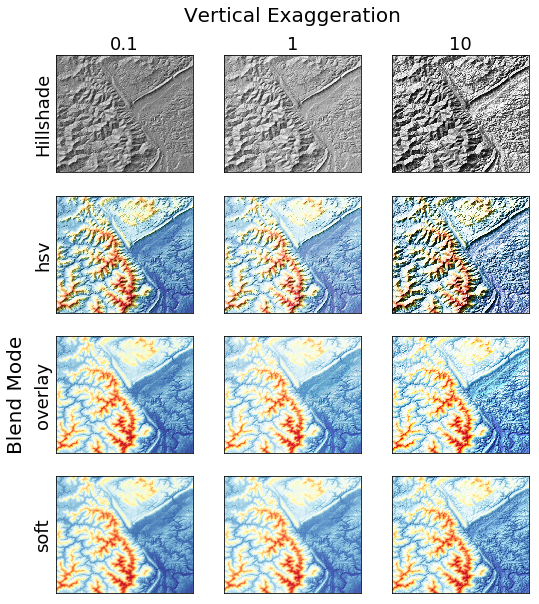

File saved as: ./output/basemap_module/vert_RdYlBu_r.png
CPU times: user 4.11 s, sys: 479 ms, total: 4.59 s
Wall time: 3.93 s


In [12]:
%time topographic_hillshading(outdir + \
    'vert_RdYlBu_r.png', plt.cm.RdYlBu_r)

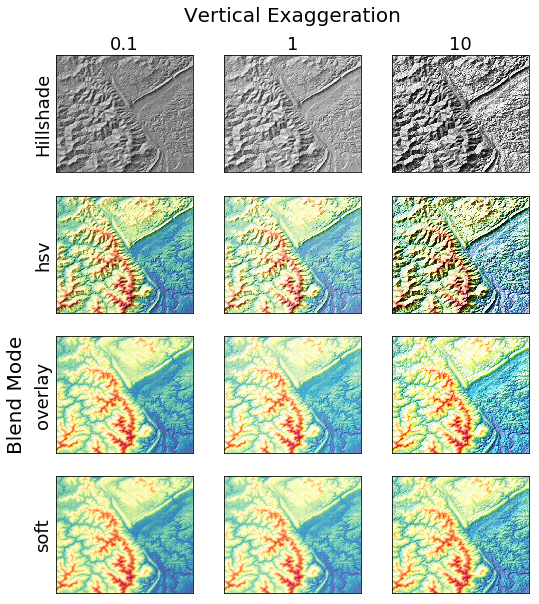

File saved as: ./output/basemap_module/vert_Spectral_r.png
CPU times: user 4.24 s, sys: 493 ms, total: 4.74 s
Wall time: 4.15 s


In [13]:
%time topographic_hillshading(outdir + \
    'vert_Spectral_r.png', plt.cm.Spectral_r)